In [ ]:
#import packages
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from datetime import datetime
import dateutil
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (8,5)
gs = gridspec.GridSpec(2, 2)
pd.options.mode.chained_assignment = None

In [ ]:
import os
from google.colab import drive
drive.mount("/content/drive/", force_remount=True)

Mounted at /content/drive/


**Data Loading**

In [ ]:
with open("/content/drive/MyDrive/DataCleaning/Data/bank-additional/bank-additional-full.csv",'r', encoding="ISO-8859-1") as reader:
    # Making a list of missing value types
    missing_values = ["n/a", "na", "-"]
    dfb = pd.read_csv(reader,na_values = missing_values,sep=';')
dfb.iloc[:10]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


**Understanding The Data**

In [ ]:
dfb.shape

(41188, 21)

In [ ]:
dfb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

**Summary Statistics**

In [ ]:
dfb.describe(include='all')


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


**Profiling Step 1: Checking for completeness of the data**

In [ ]:
dfb.isnull().sum()
list_df=[dfb]
[print(f"For the DataFrame, we have percentage of missing values as\n{round((np.mean(df.isnull()))*100)}\n\n") for df in list_df]

For the DataFrame, we have percentage of missing values as
age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64




/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


[None]

**Profiling Step 2: Checking the uniqueness, i am trying to find if there are any duplicate rows and  dropping them, if any.**

In [ ]:
duplicates_per=(((dfb.duplicated()==True).count())/len(dfb))*100
print(duplicates_per)


100.0


In [ ]:
# # bank client data:
# 1 - age (numeric)
# 2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
# 3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
# 4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
# 5 - default: has credit in default? (categorical: 'no','yes','unknown')
# 6 - housing: has housing loan? (categorical: 'no','yes','unknown')
# 7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# 8 - contact: contact communication type (categorical: 'cellular','telephone')
# 9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
# 10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
# 11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a 
# call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# 12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
# 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
# 14 - previous: number of contacts performed before this campaign and for this client (numeric)
# 15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# 16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
# 17 - cons.price.idx: consumer price index - monthly indicator (numeric)
# 18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
# 19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
# 20 - nr.employed: number of employees - quarterly indicator (numeric)
# 21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [ ]:
age_unique_values_list=dfb.job.unique()
marital_unique_values_list=dfb.marital.unique()
education_unique_values_list=dfb.education.unique()
default_unique_values_list=dfb.default.unique()
housing_unique_values_list=dfb.housing.unique()
loan_unique_values_list=dfb.loan.unique()
contact_unique_values_list=dfb.contact.unique()
month_unique_values_list=dfb.month.unique()
day_of_week_unique_values_list=dfb.day_of_week.unique()

**Profiling Step 3: Checking the validity of the data**


> For this dataset, we can check the validity of the data by comparing the attribute information proivided in the dataset with describe command results. 

* For column representing age, describe meethod output is max value is 98 and min is 17. From this we can say data  for age is valid, because it doesn't contain any negative numbers.
* For the columns job, describe() outputs 12 unique values which are 'housemaid', 'services', 'admin.', 'blue-collar', 'technician',       'retired', 'management', 'unemployed', 'self-employed', 'unknown',       'entrepreneur', 'student' data types and are valid.
* For other columns like marital status has 4 unique values, education has 8 unique values, columns default, housing and loan has 3 unique values , month has 10 unique values and days of the week has 5 unique values.

All the unique values shows that data is valid when compared with the attribute information.




**Data Cleaning**

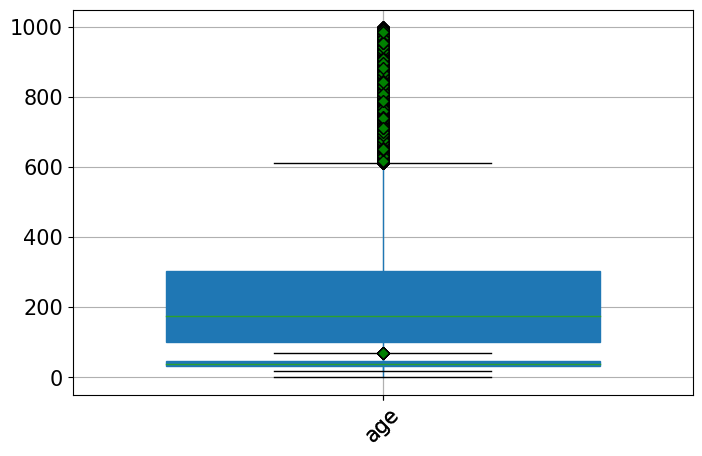

In [ ]:
# Step 1: Delete the rows which column 'poutcome' contains 'other'
condition = dfb.poutcome == 'other'
dfb = dfb.drop(dfb[condition].index, axis = 0, inplace = False)

# Step 2: Replace 'unknown' in job and education with 'other'
dfb[['job','education','marital','loan']] = dfb[['job','education','marital','loan']].replace(['unknown'],'other')

#Dropping outliers

green_diamond = dict(markerfacecolor='g', marker='D')
axes = dfb.boxplot(column=['duration'], rot=45, fontsize=15, widths = 0.7, patch_artist = True, grid=True, flierprops=green_diamond)

# dfb=dfb[dfb['duration']<1000]
# axes = dfb.boxplot(column=['duration'], rot=45, fontsize=15, widths = 0.7, patch_artist = True, grid=True, flierprops=green_diamond)

axes = dfb.boxplot(column=['age'], rot=45, fontsize=15, widths = 0.7, patch_artist = True, grid=True, flierprops=green_diamond)

# dfb= dfb[dfb['age']<=70]
# axes = dfb.boxplot(column=['age'], rot=45, fontsize=15, widths = 0.7, patch_artist = True, grid=True, flierprops=green_diamond)


**Preprocessing the data : Ordering the education column by using either of the two methods used below. So that, plot can have educations in a sorted order.**

In [ ]:
# Using pd.Categorical method to define and order education categories 
# (When you specify the categories, pandas remembers the order of specification as the default sort order.)
educations = ['basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown']
dfb['categorical_education'] = pd.Categorical(dfb['education'], categories=educations, ordered=True)
se= dfb.sort_values(by="categorical_education") 

**Preprocessing the data : Ordering the day of the week column by method used below. So that, days of the week can presented in a plot in sorted order.**

In [ ]:
#  Using pd.Categorical method to define and order day categories 
days = ["mon", "tue", "wed", "thu", "fri","sat","sun"]
dfb['categorical_day'] = pd.Categorical(dfb['day_of_week'], categories=days, ordered=True)
sda= dfb.sort_values(by="categorical_day")

**Preprocessing the data : Ordering the month column by using either of the two methods used below. So that, plot can have months in a sorted order.**

In [ ]:
# 1. Using pd.Categorical method to define and order month categories 
# (When you specify the categories, pandas remembers the order of specification as the default sort order.)
months = ["jan", "feb", "mar", "apr", "may", "jun", 
          "jul", "aug", "sep", "oct", "nov", "dec"]
dfb['categorical_month'] = pd.Categorical(dfb['month'], categories=months, ordered=True)
sm= dfb.sort_values(by="categorical_month") 

**Preprocessing the data : Categorising the age column**

In [ ]:
# Using pd.cut method to categorize age column using bins
# There are no people of age 0-10 , so used 10 as min age to make groups. 
# Checked it using this (children = pd.DataFrame() children=sa[sa['age_groups'] =='[0, 10)'])

bins= np.arange(10,110,10,dtype=int) 
dfb['age_groups']= pd.cut(dfb['age'], bins, ordered=True, right=False)
sa= dfb.sort_values(by="age")

**Preprocessing the data : Categorising the duration column**

In [ ]:
# Using pd.Categorical method to categorize duration column
bins= np.arange(0,1000,100,dtype=int)
dfb['duration_groups'] = pd.cut(dfb['duration'], bins, ordered=True, right=False)
sd= dfb.sort_values(by="duration")
sd=sd[sd['duration']>0]
sd_no= sd[sd['y'] == 'no']
sd_yes=sd[sd['y'] == 'yes']

**Exploration Step1:1.	If there is any relation between age of clients and subscriptions?**

Text(0.5, 1.0, 'Distribution of age and subscription')

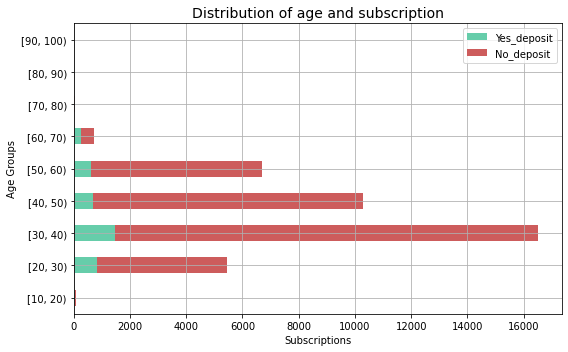

In [ ]:
# Creating two dataframe based on the subscription outcomes
sa_no= sa[sa['y'] == 'no']
sa_yes=sa[sa['y'] == 'yes']

# Counting the number of subscriptions for different age groups and outcomes
Temp= pd.DataFrame()
Temp['Yes_deposit'] =sa_yes.groupby(['age_groups'])['y'].count()
Temp['No_deposit'] = sa_no.groupby(['age_groups'])['y'].count()

# Plotting the variables age groups , count of different outcomes
Temp.plot(kind='barh',stacked=True,color={"No_deposit": "IndianRed", "Yes_deposit": "MediumAquamarine"},grid=True)
plt.xlabel('Subscriptions', fontsize=10)
plt.ylabel('Age Groups', fontsize=10)
plt.title('Distribution of age and subscription', loc='Center', fontsize=14)

**Observation:** Looks like most people that were contacted and also most of people deposited belongs to age group : (30 - 40)

Text(0.5, 1.0, 'Distribution of age and subscriptions for 10 people contacted in each age group')

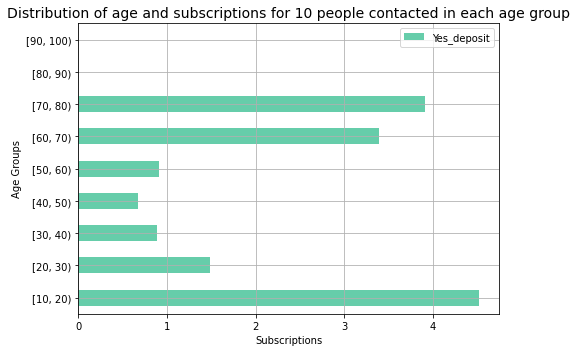

In [ ]:
# Finding out the success of subscription rates per 10 people (total['count'].min() is 10) contacted
sa_no= sa[sa['y'] == 'no']
sa_yes=sa[sa['y'] == 'yes']
age= pd.DataFrame()
age['Yes_deposit'] =sa_yes.groupby(['age_groups'])['y'].count()

# Calculating total count of people contacted in each age group
total= pd.DataFrame()
total['count']=((sa_yes.groupby(['age_groups'])['y'].count())+(sa_no.groupby(['age_groups'])['y'].count()))

#Normalizing the dataframes each age group's total count to 10
age['Yes_deposit'] =((sa_yes.groupby(['age_groups'])['y'].count())/(total['count']))*10

# Plotting the normalized count vs age groups 
age.plot.barh(color='MediumAquamarine', grid=True)
plt.xlabel('Subscriptions', fontsize=10)
plt.ylabel('Age Groups', fontsize=10)
plt.title('Distribution of age and subscriptions for 10 people contacted in each age group', loc='Center', fontsize=14)


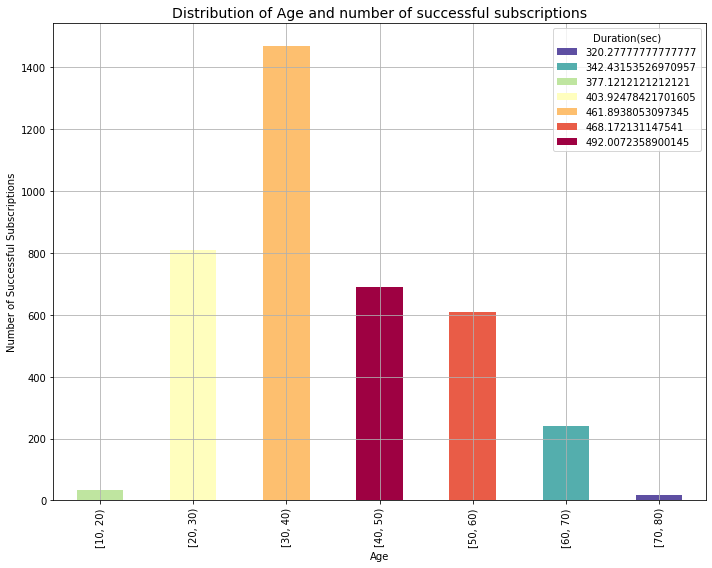

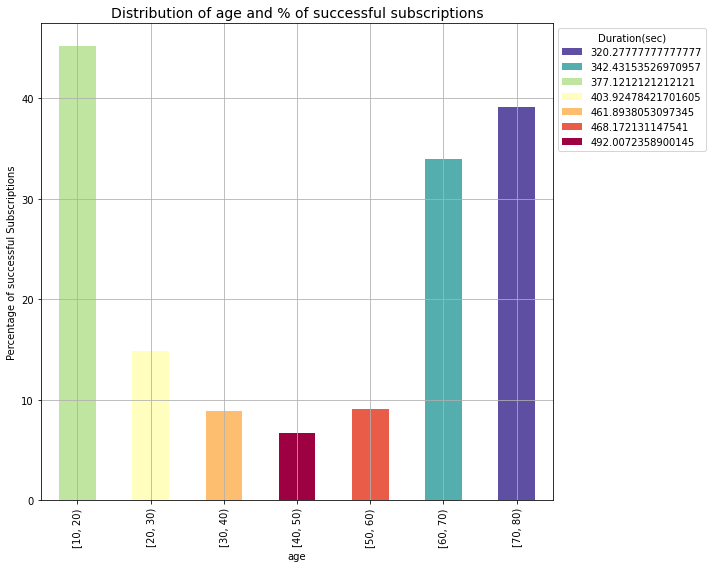

In [ ]:
#Finding out average duration of calls that were successful for each age group
Temp4= pd.DataFrame() 
sa_yes=sa[sa['y'] == 'yes']
Temp4['Yes_deposit'] = sa_yes.groupby(['age_groups'])['y'].count()

sa_no = sa[sa['y'] == 'no']
Temp4['No_deposit'] = sa_no.groupby(['age_groups'])['y'].count()


Temp4['yes_duration']= sa_yes.groupby(['age_groups'])['duration'].mean()
Temp4['yes_duration']= Temp4['yes_duration'].replace(np.nan,0)
# Temp4['yes_duration']=Temp4['yes_duration'].astype('int64')

Temp4['No_duration']= sa_no.groupby(['age_groups'])['duration'].mean()
Temp4['No_duration']= Temp4['No_duration'].replace(np.nan,0)
# Temp4['No_duration'] = Temp4.astype({'No_duration': 'int64'})

Temp4=Temp4[Temp4['yes_duration']!=0]

plt.rcParams["figure.figsize"] = [10, 8]
plt.rcParams["figure.autolayout"] = True
Temp4.pivot_table(index='age_groups', columns='yes_duration', values='Yes_deposit',aggfunc='sum', fill_value=0).plot.bar(stacked=True,grid=True,colormap="Spectral_r").legend(title="Duration(sec)",bbox_to_anchor=(1.0, 1.0))
# Temp4.plot.bar(stacked=True,color={"No_deposit": "IndianRed", "Yes_deposit": "MediumAquamarine"})
plt.xlabel('Age', fontsize=10)
plt.ylabel('Number of Successful Subscriptions', fontsize=10)
plt.title('Distribution of Age and number of successful subscriptions', loc='Center', fontsize=14)
plt.show()


Temp4['total']=Temp4['No_deposit'] + Temp4['Yes_deposit']
Temp4['Yes_deposit_percent']=(Temp4['Yes_deposit']/Temp4['total'])*100
Temp4['Yes_deposit_percent']= Temp4['Yes_deposit_percent'].replace(np.nan,0)

duration= pd.DataFrame()
duration = Temp4
duration=duration[duration['yes_duration']!=0]


plt.rcParams["figure.figsize"] = [10, 8]
plt.rcParams["figure.autolayout"] = True
duration.pivot_table(index='age_groups', columns='yes_duration', values='Yes_deposit_percent', fill_value=0).plot.bar(stacked=True,grid=True,colormap="Spectral_r").legend(title="Duration(sec)",bbox_to_anchor=(1.0, 1.0))
# Temp4.plot.bar(stacked=True,color={"No_deposit": "IndianRed", "Yes_deposit": "MediumAquamarine"})
plt.xlabel('age', fontsize=10)
plt.ylabel('Percentage of successful Subscriptions', fontsize=10)
plt.title('Distribution of age and % of successful subscriptions', loc='Center', fontsize=14)
plt.show()





**Observation:** These results are unexpected, as we can see that for every 10 people contacted in each group, higher subscription rates can be observed in the age group : (70-80) followed by (10-20) and then (60-70) .

**Exploration Step 2:	Does education play major role in subscribing for a term deposit?**

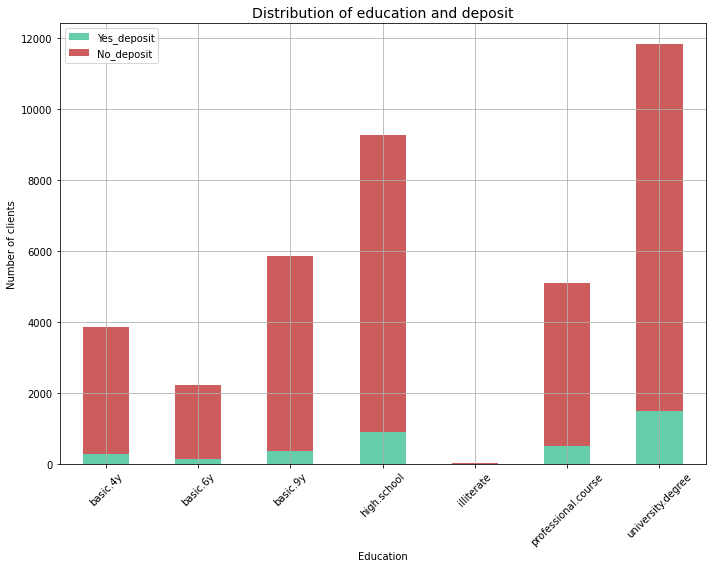

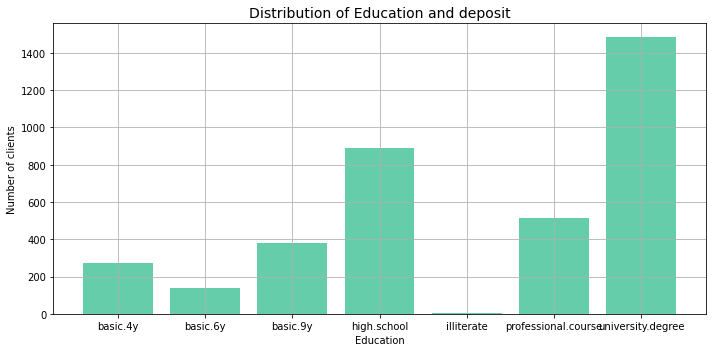

In [ ]:
# count categorical values
Temp1= pd.DataFrame() 
se_yes=se[se['y'] == 'yes']
Temp1['Yes_deposit'] = se_yes.groupby(['categorical_education'])['y'].count()
se_no = se[se['y'] == 'no']
Temp1['No_deposit'] = se_no.groupby(['categorical_education'])['y'].count()

# Removing the category of unknown to get better observations
Temp1=Temp1.drop(labels=['unknown'])

Temp1.plot(kind='bar',rot=45,stacked=True,color={"No_deposit": "IndianRed", "Yes_deposit": "MediumAquamarine"},grid= True)
plt.xlabel('Education', fontsize=10)
plt.ylabel('Number of clients', fontsize=10)
plt.title('Distribution of education and deposit', loc='Center', fontsize=14)
plt.show()

plt.figure(figsize=(10,5))
plt.bar(Temp1.index,'Yes_deposit', data=Temp1, color='MediumAquamarine', linewidth=1)
plt.grid()
plt.xlabel('Education', fontsize=10)
plt.ylabel('Number of clients', fontsize=10)
plt.title('Distribution of Education and deposit', loc='Center', fontsize=14)
plt.show()


**Observation :**  We can see that most of the people that were contacted and have higher successful subscriptions are the people who pursued university degree. 

Text(0.5, 1.0, 'Distribution of Education and subscriptions for 10 people contacted in each age group')

<Figure size 576x360 with 0 Axes>

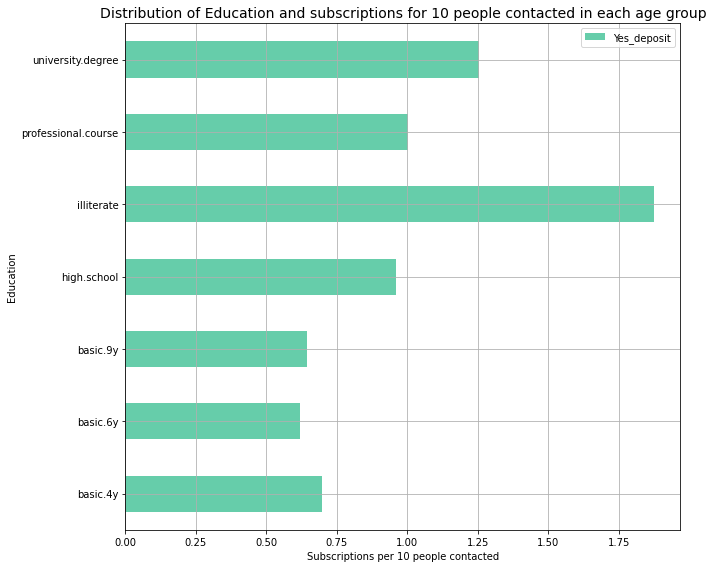

In [ ]:
# Normalizing the count of people contacted to 1
se_no= se[se['y'] == 'no']
se_yes=se[se['y'] == 'yes']

# Calculating total count of people contacted in each age group
total= pd.DataFrame()
total['count']=((se_yes.groupby(['categorical_education'])['y'].count())+(se_no.groupby(['categorical_education'])['y'].count()))

education= pd.DataFrame()
education['Yes_deposit'] =se_yes.groupby(['categorical_education'])['y'].count()
education['Yes_deposit'] =((se_yes.groupby(['categorical_education'])['y'].count())/(total['count']))*10

# Removing the category of unknown to get better observations
education=education.drop(labels=['unknown'])

# Plotting the normalized count vs education categories 
plt.figure(figsize=(8,5))
education.plot.barh(color='MediumAquamarine', grid=True)
plt.xlabel('Subscriptions per 10 people contacted', fontsize=10)
plt.ylabel('Education', fontsize=10)
plt.title('Distribution of Education and subscriptions for 10 people contacted in each age group', loc='Center', fontsize=14)


**Observation:** Looks like illiterate people are more attracted towards this bank marketing strategies. Followed by people who pursued university degree. May be they are the people who are in the stage of earning a bit higher amount of salary than other category people and wants to save some money for future investments.

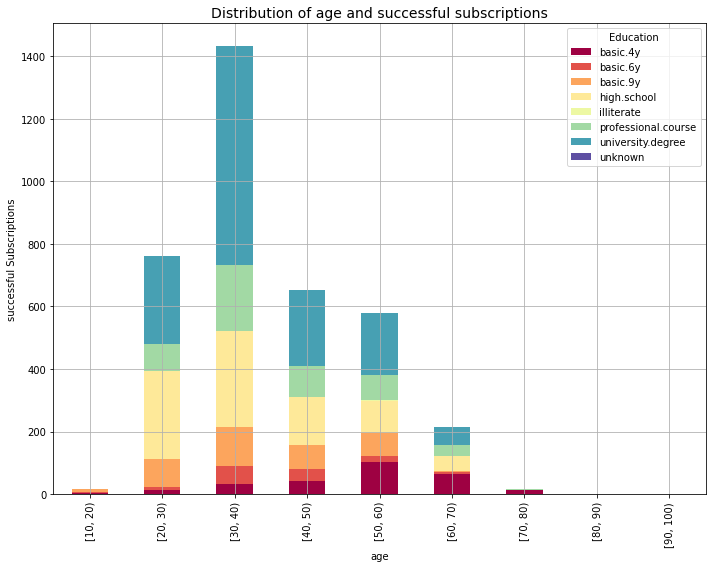

In [ ]:
# What could be the age groups of people belonging to different educational categories and who have higher subscription rates?
age_education= pd.DataFrame()

age_education['Subscription_rates']= sa_yes.groupby(['age_groups','categorical_education'])['y'].count()
age_education['Subscription_rates']= age_education['Subscription_rates'].replace(np.nan,0)

total= pd.DataFrame()
total['total']=Temp.groupby(['age_groups'])['No_deposit'].sum() + Temp.groupby(['age_groups'])['Yes_deposit'].sum()

plt.rcParams["figure.figsize"] = [10, 8]
plt.rcParams["figure.autolayout"] = True
age_education.pivot_table(index='age_groups', columns='categorical_education', values='Subscription_rates', fill_value=0).plot.bar(stacked=True,grid=True,colormap="Spectral").legend(title="Education",bbox_to_anchor=(1.0, 1.0))
# yes_education.plot.bar(stacked=True,colormap='Paired')
plt.xlabel('age', fontsize=10)
plt.ylabel('successful Subscriptions', fontsize=10)
plt.title('Distribution of age and successful subscriptions', loc='Center', fontsize=14)
plt.show()

**Observation:** Well, people who have university degree and in the age group of (30-40) have higher rate of subscription for the term deposit.

**Exploration step 3: Does the duration of phone calls effect the subscriptions ?**

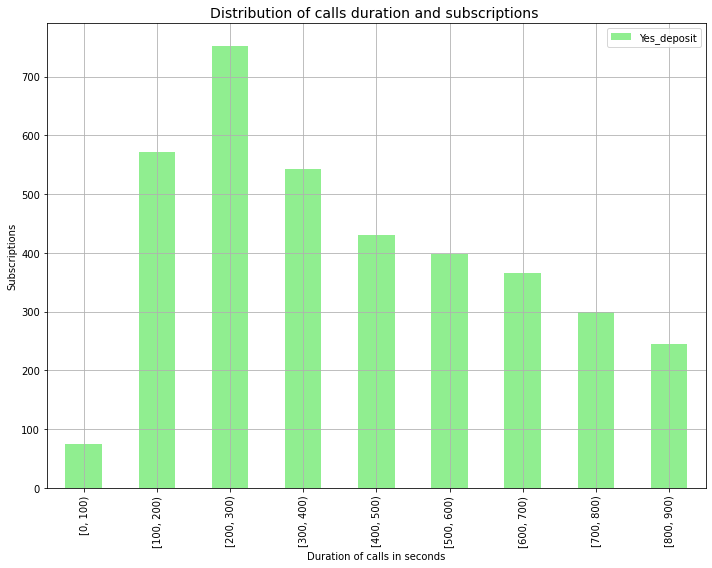

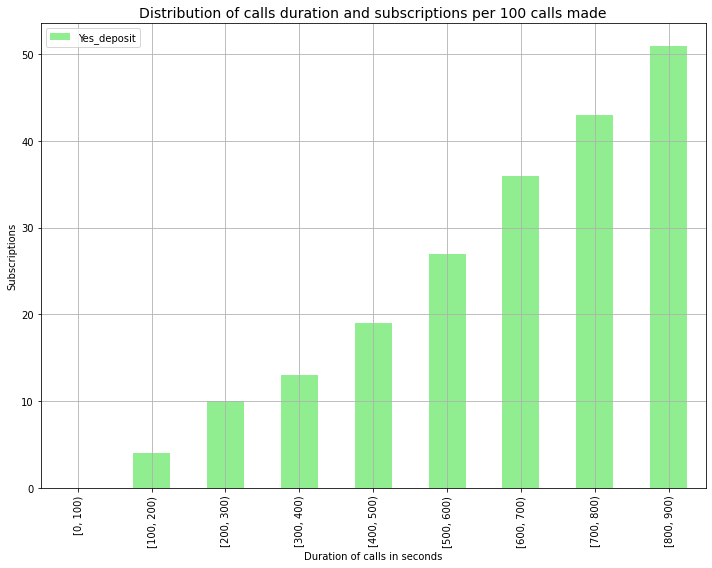

In [ ]:
Temp2= pd.DataFrame()
Temp2['Yes_deposit'] = sd_yes.groupby(['duration_groups'])['y'].count()

Temp2.plot(kind='bar',color="lightgreen", grid= True)
plt.xlabel('Duration of calls in seconds', fontsize=10)
plt.ylabel('Subscriptions', fontsize=10)
plt.title('Distribution of calls duration and subscriptions ', loc='Center', fontsize=14)
plt.show()

Temp2['No_deposit'] = sd_no.groupby(['duration_groups'])['y'].count()

percent= pd.DataFrame()
percent['No_deposit'] = sd_no.groupby(['duration_groups'])['y'].count()
percent['Yes_deposit'] = sd_yes.groupby(['duration_groups'])['y'].count()



Temp2['total']=Temp2['Yes_deposit'] + Temp2['No_deposit'] 
Temp2=Temp2[Temp2['total']>100]


Temp2['No_deposit_p']=(Temp2['No_deposit']/(Temp2['No_deposit'] + Temp2['Yes_deposit']))*100
Temp2['No_deposit_p']= Temp2['No_deposit_p'].replace(np.nan,0)

Temp2['Yes_deposit_p']=(Temp2['Yes_deposit']/(Temp2['No_deposit'] + Temp2['Yes_deposit']))*100
Temp2['Yes_deposit_p']= Temp2['Yes_deposit_p'].replace(np.nan,0)

percent['No_deposit'] = Temp2['No_deposit_p']
percent['Yes_deposit'] = Temp2['Yes_deposit_p']
percent=percent.dropna()

percent['No_deposit']= percent['No_deposit'].astype('int64')
percent['Yes_deposit']= percent['Yes_deposit'].astype('int64')

percent.index
percent.drop('No_deposit', axis=1, inplace=True)

percent.plot(kind='bar',color="lightgreen", grid= True)
plt.xlabel('Duration of calls in seconds', fontsize=10)
plt.ylabel('Subscriptions', fontsize=10)
plt.title('Distribution of calls duration and subscriptions per 100 calls made', loc='Center', fontsize=14)
plt.show()

**Observation:** Most of the duration groups above 1400sec are discarded, as we have set up the threshold level to have atleast 100 calls are recorded in each duration group. The results shows that calls of duration above 800 seconds have 50% of successful subscriptions. Normalization can help in identifying different patterns.

**Exploration Step 4:	Employees of which job categories are more into subscription policies**

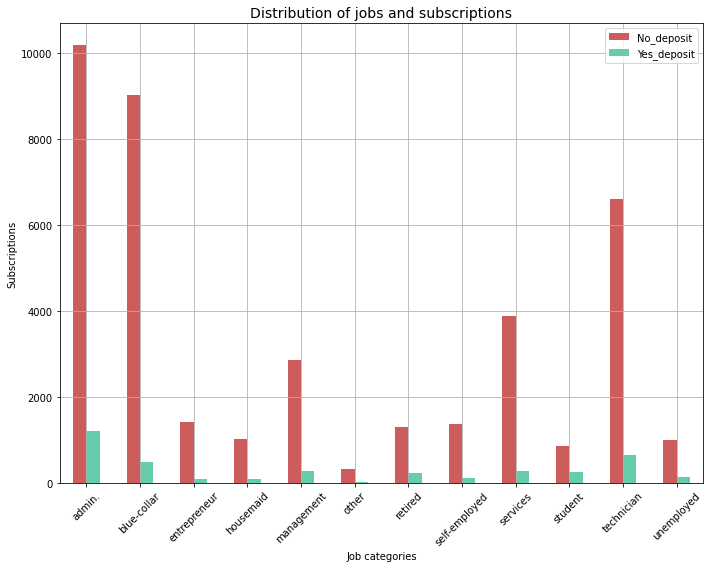

In [ ]:
Temp3= pd.DataFrame() 
dfb_no = dfb[dfb['y'] == 'no']
Temp3['No_deposit'] = dfb.groupby(['job'])['job'].count()
dfb_yes=dfb[dfb['y'] == 'yes']
Temp3['Yes_deposit'] = dfb_yes.groupby(['job'])['job'].count()

Temp3.plot.bar(color={"No_deposit": "IndianRed", "Yes_deposit": "MediumAquamarine"},rot=45, grid= True)
plt.xlabel('Job categories', fontsize=10)
plt.ylabel('Subscriptions', fontsize=10)
plt.title('Distribution of jobs and subscriptions', loc='Center', fontsize=14)
plt.show()

**Observation:** People working as adminstrator, technichian followed by blue-collar have highest subscription rates.

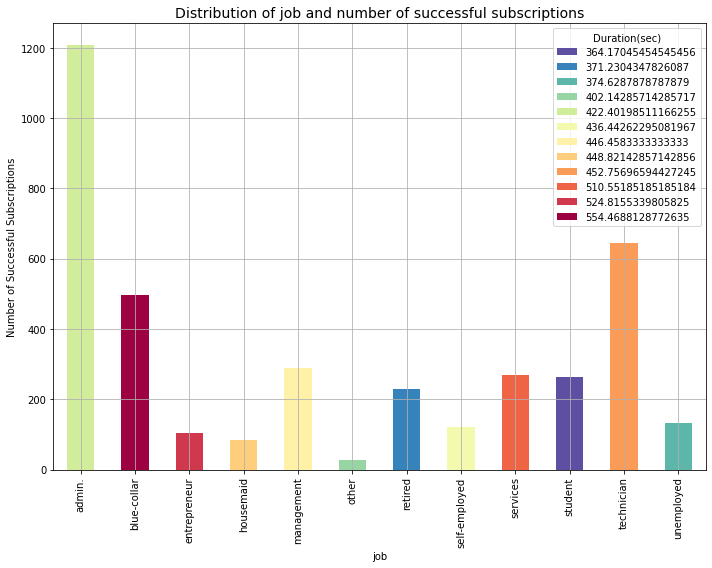

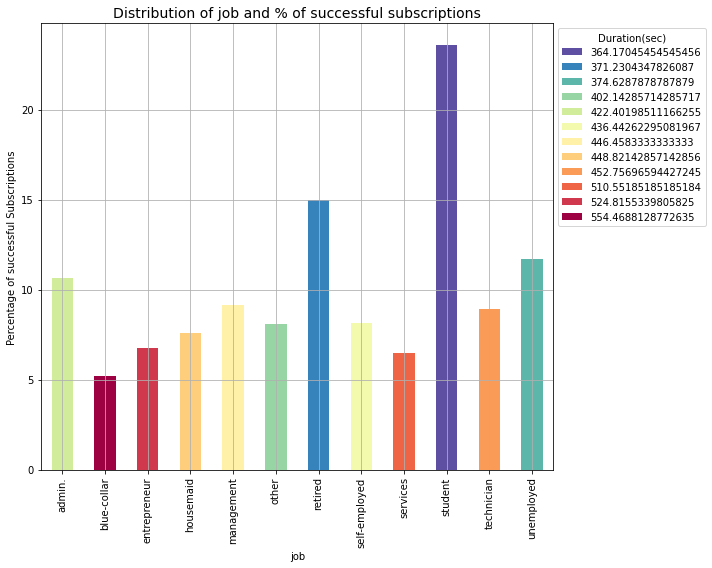

In [ ]:
#Finding out average duration of calls that were successful for each age group
Temp3= pd.DataFrame() 
dfb_no = dfb[dfb['y'] == 'no']
Temp3['No_deposit'] = dfb.groupby(['job'])['job'].count()
dfb_yes=dfb[dfb['y'] == 'yes']
Temp3['Yes_deposit'] = dfb_yes.groupby(['job'])['job'].count()


Temp3['yes_duration']= dfb_yes.groupby(['job'])['duration'].mean()
Temp3['yes_duration']= Temp3['yes_duration'].replace(np.nan,0)
# Temp4['yes_duration']=Temp4['yes_duration'].astype('int64')

Temp3['No_duration']= dfb_no.groupby(['job'])['duration'].mean()
Temp3['No_duration']= Temp3['No_duration'].replace(np.nan,0)
# Temp4['No_duration'] = Temp4.astype({'No_duration': 'int64'})

Temp3=Temp3[Temp3['yes_duration']!=0]

plt.rcParams["figure.figsize"] = [10, 8]
plt.rcParams["figure.autolayout"] = True
Temp3.pivot_table(index='job', columns='yes_duration', values='Yes_deposit',aggfunc='sum', fill_value=0).plot.bar(stacked=True,grid=True,colormap="Spectral_r").legend(title="Duration(sec)",bbox_to_anchor=(1.0, 1.0))
# Temp4.plot.bar(stacked=True,color={"No_deposit": "IndianRed", "Yes_deposit": "MediumAquamarine"})
plt.xlabel('job', fontsize=10)
plt.ylabel('Number of Successful Subscriptions', fontsize=10)
plt.title('Distribution of job and number of successful subscriptions', loc='Center', fontsize=14)
plt.show()


Temp3['total']=Temp3['No_deposit'] + Temp3['Yes_deposit']
Temp3['Yes_deposit_percent']=(Temp3['Yes_deposit']/Temp3['total'])*100
Temp3['Yes_deposit_percent']= Temp3['Yes_deposit_percent'].replace(np.nan,0)

duration= pd.DataFrame()
duration = Temp3
duration=duration[duration['yes_duration']!=0]


plt.rcParams["figure.figsize"] = [10, 8]
plt.rcParams["figure.autolayout"] = True
duration.pivot_table(index='job', columns='yes_duration', values='Yes_deposit_percent', fill_value=0).plot.bar(stacked=True,grid=True,colormap="Spectral_r").legend(title="Duration(sec)",bbox_to_anchor=(1.0, 1.0))
# Temp4.plot.bar(stacked=True,color={"No_deposit": "IndianRed", "Yes_deposit": "MediumAquamarine"})
plt.xlabel('job', fontsize=10)
plt.ylabel('Percentage of successful Subscriptions', fontsize=10)
plt.title('Distribution of job and % of successful subscriptions', loc='Center', fontsize=14)
plt.show()





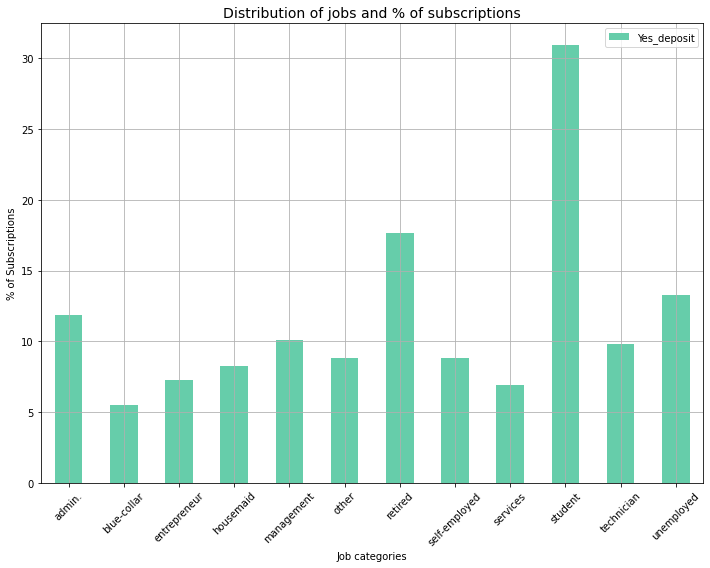

In [ ]:
Temp3= pd.DataFrame() 
dfb_no = dfb[dfb['y'] == 'no']
Temp3['No_deposit'] = dfb.groupby(['job'])['y'].count()
dfb_yes=dfb[dfb['y'] == 'yes']
Temp3['Yes_deposit'] = dfb_yes.groupby(['job'])['y'].count()

# Calculating total count of people contacted in each age group
total= pd.DataFrame()
total['count']=((dfb_yes.groupby(['job'])['y'].count())+(dfb_no.groupby(['job'])['y'].count()))

Temp3= pd.DataFrame()
Temp3['Yes_deposit'] =dfb_yes.groupby(['job'])['y'].count()
Temp3['Yes_deposit'] =((dfb_yes.groupby(['job'])['y'].count())/(total['count']))*100


Temp3.plot.bar(color={"No_deposit": "IndianRed", "Yes_deposit": "MediumAquamarine"},rot=45, grid= True)
plt.xlabel('Job categories', fontsize=10)
plt.ylabel('% of Subscriptions', fontsize=10)
plt.title('Distribution of jobs and % of subscriptions', loc='Center', fontsize=14)
plt.show()

**Observation:** This bar chart shows that students are have higher percent of subscriptions for term deposit followed by retired people compared to people of other job categories. May be retired people get their PFA, which may be why they have subscribed for term deposits.

**Exploration Step 5:	On which day or month are subscription rates higher**

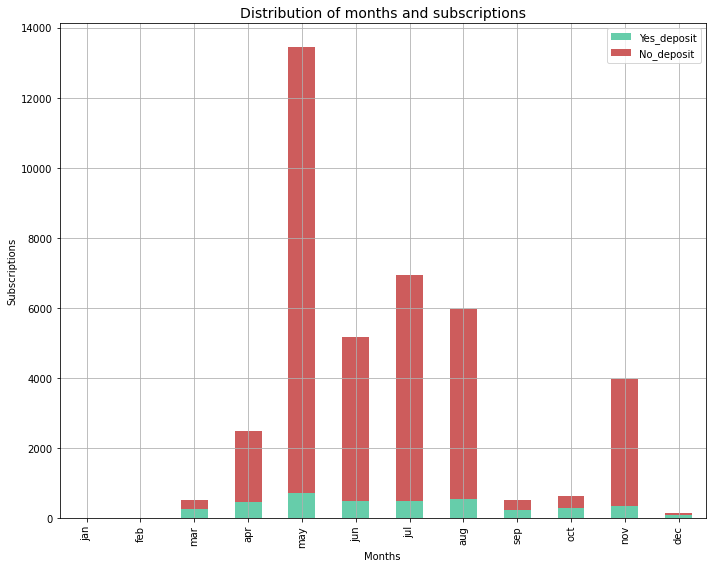

Text(0.5, 1.0, 'Distribution of Months and subscriptions')

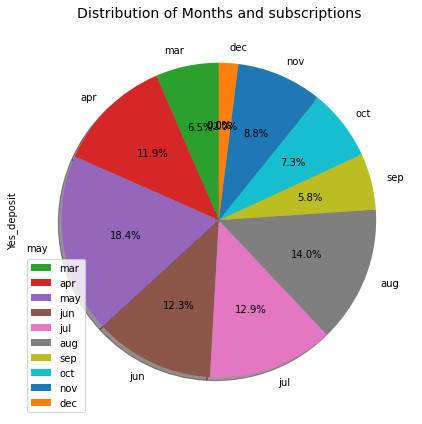

In [ ]:
Temp4= pd.DataFrame() 
sm_yes=sm[sm['y'] == 'yes']
Temp4['Yes_deposit'] = sm_yes.groupby(['categorical_month'])['month'].count()
sm_no = sm[sm['y'] == 'no']
Temp4['No_deposit'] = sm_no.groupby(['categorical_month'])['month'].count()

Temp4.plot.bar(stacked=True,color={"No_deposit": "IndianRed", "Yes_deposit": "MediumAquamarine"},grid=True)
plt.xlabel('Months', fontsize=10)
plt.ylabel('Subscriptions', fontsize=10)
plt.title('Distribution of months and subscriptions', loc='Center', fontsize=14)
plt.show()

Temp4= Temp4.drop(columns='No_deposit')

Temp4.plot.pie(subplots=True, figsize=(6, 6),autopct='%1.1f%%',shadow = True, startangle=90)
plt.title('Distribution of Months and subscriptions', loc='Center', fontsize=14)

**Observation:** From the plot, we can observe 17.8% of total successful subscriptions took in may followed by july and august. 

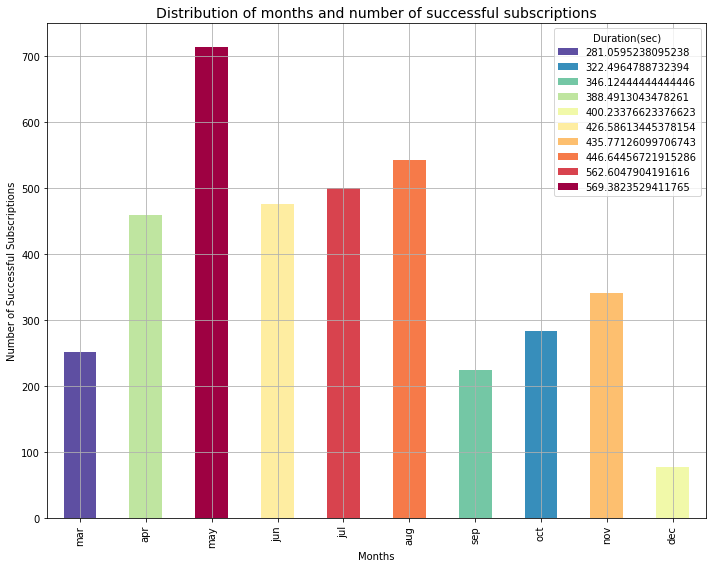

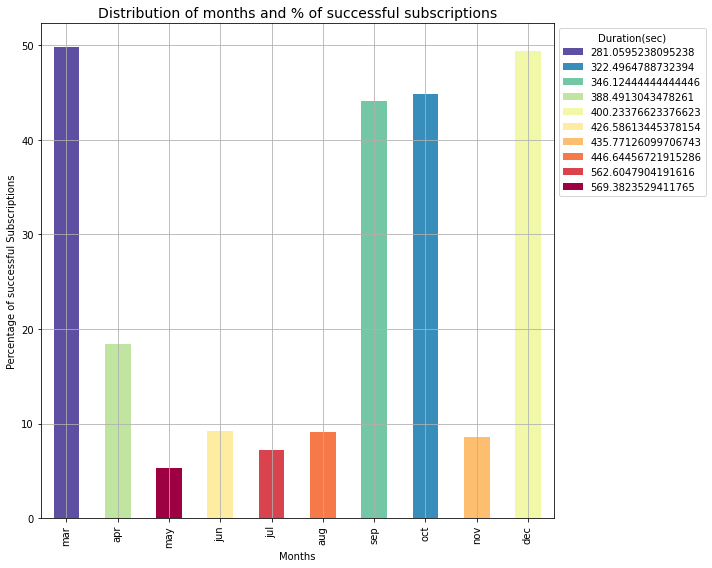

In [ ]:
#Finding out average duration of calls that were successful each month
Temp4= pd.DataFrame() 
sm_yes=sm[sm['y'] == 'yes']
Temp4['Yes_deposit'] = sm_yes.groupby(['categorical_month'])['y'].count()

sm_no = sm[sm['y'] == 'no']
Temp4['No_deposit'] = sm_no.groupby(['categorical_month'])['y'].count()


Temp4['yes_duration']= sm_yes.groupby(['categorical_month'])['duration'].mean()
Temp4['yes_duration']= Temp4['yes_duration'].replace(np.nan,0)
# Temp4['yes_duration']=Temp4['yes_duration'].astype('int64')

Temp4['No_duration']= sm_no.groupby(['categorical_month'])['duration'].mean()
Temp4['No_duration']= Temp4['No_duration'].replace(np.nan,0)
# Temp4['No_duration'] = Temp4.astype({'No_duration': 'int64'})

Temp4=Temp4[Temp4['yes_duration']!=0]

plt.rcParams["figure.figsize"] = [10, 8]
plt.rcParams["figure.autolayout"] = True
Temp4.pivot_table(index='categorical_month', columns='yes_duration', values='Yes_deposit',aggfunc='sum', fill_value=0).plot.bar(stacked=True,grid=True,colormap="Spectral_r").legend(title="Duration(sec)",bbox_to_anchor=(1.0, 1.0))
# Temp4.plot.bar(stacked=True,color={"No_deposit": "IndianRed", "Yes_deposit": "MediumAquamarine"})
plt.xlabel('Months', fontsize=10)
plt.ylabel('Number of Successful Subscriptions', fontsize=10)
plt.title('Distribution of months and number of successful subscriptions', loc='Center', fontsize=14)
plt.show()


Temp4['total']=Temp4['No_deposit'] + Temp4['Yes_deposit']
Temp4['Yes_deposit_percent']=(Temp4['Yes_deposit']/Temp4['total'])*100
Temp4['Yes_deposit_percent']= Temp4['Yes_deposit_percent'].replace(np.nan,0)

duration= pd.DataFrame()
duration = Temp4
duration=duration[duration['yes_duration']!=0]


plt.rcParams["figure.figsize"] = [10, 8]
plt.rcParams["figure.autolayout"] = True
duration.pivot_table(index='categorical_month', columns='yes_duration', values='Yes_deposit_percent', fill_value=0).plot.bar(stacked=True,grid=True,colormap="Spectral_r").legend(title="Duration(sec)",bbox_to_anchor=(1.0, 1.0))
# Temp4.plot.bar(stacked=True,color={"No_deposit": "IndianRed", "Yes_deposit": "MediumAquamarine"})
plt.xlabel('Months', fontsize=10)
plt.ylabel('Percentage of successful Subscriptions', fontsize=10)
plt.title('Distribution of months and % of successful subscriptions', loc='Center', fontsize=14)
plt.show()





**Observation:** From the first plot we can see that months with higher subscriptions are may, july and august have average duration of 704sec,709 and 549 sec. But the second plot shows higher percentage of successful subscriptions are observed in march, december and september have average duration of calls in the range of 309 to 423 seconds. Prior to this plot, we have seen that students and retired people have subcribed more to term deposits. So ,march and december could be the leisure or holiday seasons where people might be willing to attend the calls when compared to other seasons with work.

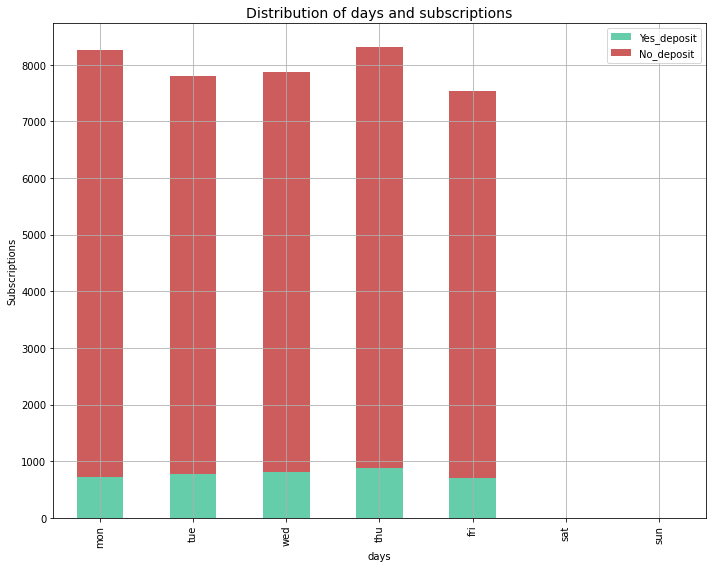

Text(0.5, 1.0, 'Distribution of days of the week and subscriptions')

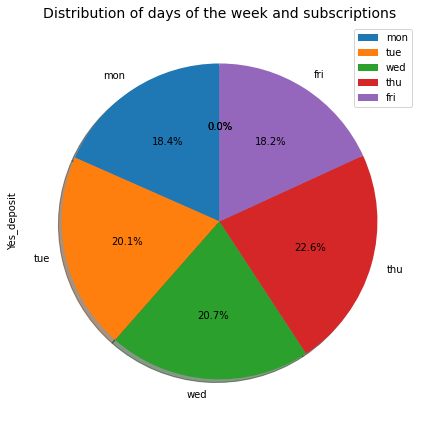

In [ ]:
Temp5= pd.DataFrame() 
sda_yes=sda[sda['y'] == 'yes']
Temp5['Yes_deposit'] = sda_yes.groupby(['categorical_day'])['day_of_week'].count()
sda_no = sda[sda['y'] == 'no']
Temp5['No_deposit'] = sda_no.groupby(['categorical_day'])['day_of_week'].count()

Temp5.plot.bar(stacked=True,color={"No_deposit": "IndianRed", "Yes_deposit": "MediumAquamarine"}, grid=True)
plt.xlabel('days', fontsize=10)
plt.ylabel('Subscriptions', fontsize=10)
plt.title('Distribution of days and subscriptions', loc='Center', fontsize=14)
plt.show()

Temp5= Temp5.drop(columns='No_deposit')

Temp5.plot.pie(subplots=True, figsize=(6, 6),autopct='%1.1f%%',shadow = True,startangle=90)
plt.title('Distribution of days of the week and subscriptions', loc='Center', fontsize=14)

**Observation:** Results shows that more subscriptions took place on thursdays followed by wednesday and tuesday.

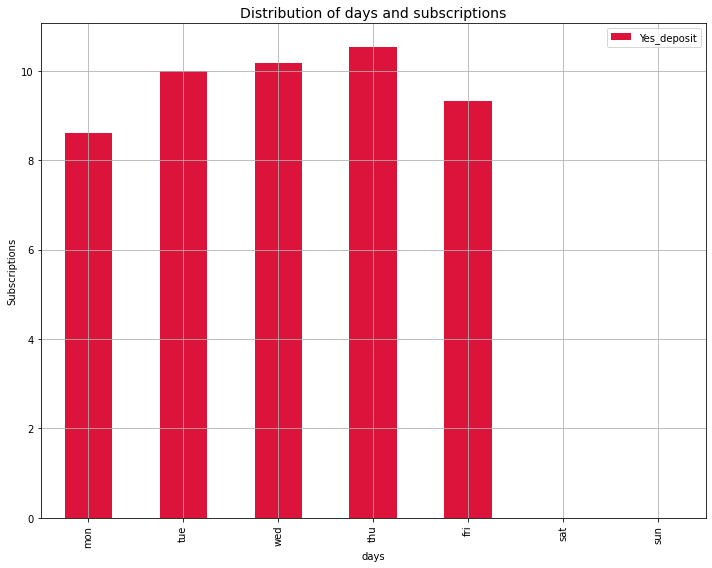

In [ ]:
# Let us find the percentage of successful subscriptions based on the total calls made on different days of the week
Temp5= pd.DataFrame() 
sda_yes=sda[sda['y'] == 'yes']
Temp5['Yes_deposit'] = sda_yes.groupby(['categorical_day'])['y'].count()
sda_no = sda[sda['y'] == 'no']
Temp5['No_deposit'] = sda_no.groupby(['categorical_day'])['y'].count()

# Calculating total count of people contacted in each age group
total= pd.DataFrame()
total['count']=((dfb_yes.groupby(['categorical_day'])['y'].count())+(dfb_no.groupby(['categorical_day'])['y'].count()))

Temp5= pd.DataFrame()
Temp5['Yes_deposit'] =dfb_yes.groupby(['categorical_day'])['y'].count()
Temp5['Yes_deposit'] =((dfb_yes.groupby(['categorical_day'])['y'].count())/(total['count']))*100

Temp5.plot.bar(stacked=True,color="crimson", grid=True)
plt.xlabel('days', fontsize=10)
plt.ylabel('Subscriptions', fontsize=10)
plt.title('Distribution of days and subscriptions', loc='Center', fontsize=14)
plt.show()


**Observation:** We can see that of the total calls made on thursday, nearly 11% were succeeded. This could not be justified with other parameters provided in the dataset.

**Exploration Step 6:	Does contacts to client helps in achieving higher subscription rates?**

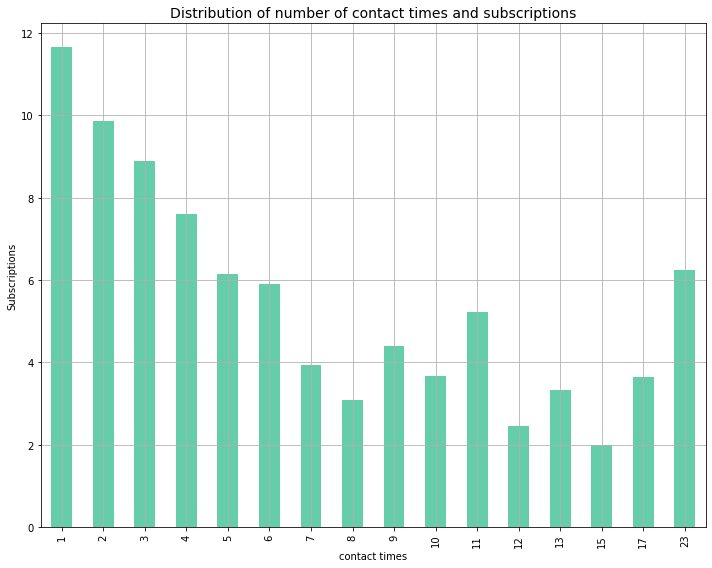

In [ ]:
Temp6= pd.DataFrame() 
dfb_yes=dfb[dfb['y'] == 'yes']
Temp6['Yes_deposit'] = dfb_yes.groupby(['campaign'])['y'].count()
dfb_no = dfb[dfb['y'] == 'no']
Temp6['No_deposit'] = dfb_no.groupby(['campaign'])['y'].count()

# calculate the percent relative to the index
total = ((Temp6['Yes_deposit']) /(Temp6['Yes_deposit'] + Temp6['No_deposit']))*100

p1 = total.plot(kind='bar',stacked=True,color="MediumAquamarine",linewidth=1)
plt.grid(zorder=3)
plt.xlabel('contact times', fontsize=10)
plt.ylabel('Subscriptions', fontsize=10)
plt.title('Distribution of number of contact times and subscriptions', loc='Center', fontsize=14)

plt.show()

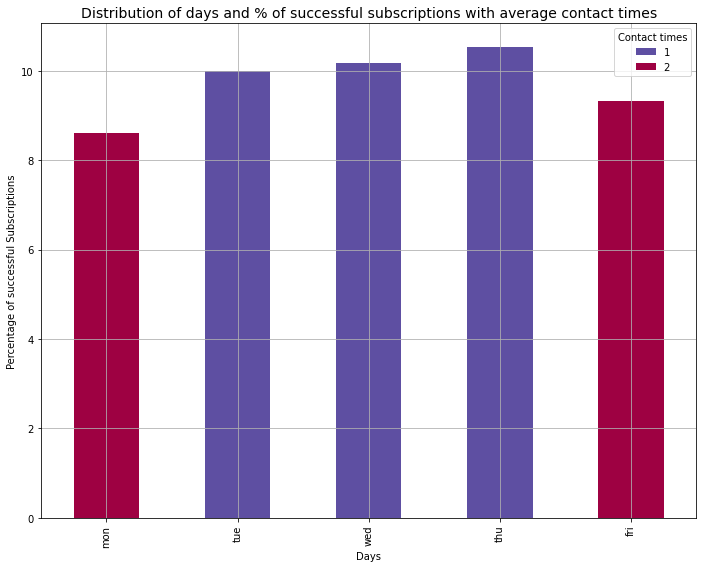

In [ ]:
#Finding out average duration of calls that were successful each day of the week
Temp6= pd.DataFrame() 
dfb_yes=dfb[dfb['y'] == 'yes']
Temp6['Yes_deposit'] = dfb_yes.groupby(['categorical_day'])['y'].count()

dfb_no = dfb[dfb['y'] == 'no']
Temp6['No_deposit'] = dfb_no.groupby(['categorical_day'])['y'].count()


Temp6['yes_campaign']= dfb_yes.groupby(['categorical_day'])['campaign'].mean()
Temp6['yes_campaign']= Temp6['yes_campaign'].replace(np.nan,0)
Temp6['yes_campaign']=Temp6['yes_campaign'].astype('int64')

Temp6['No_campaign']= dfb_no.groupby(['categorical_day'])['campaign'].mean()
Temp6['No_campaign']= Temp6['No_campaign'].replace(np.nan,0)
Temp6['No_campaign'] = Temp6.astype({'No_campaign': 'int64'})

Temp6=Temp6[Temp6['yes_campaign']!=0]

Temp6['total']=Temp6['No_deposit'] + Temp6['Yes_deposit']
Temp6['Yes_deposit_percent']=(Temp6['Yes_deposit']/Temp6['total'])*100
Temp6['Yes_deposit_percent']= Temp6['Yes_deposit_percent'].replace(np.nan,0)

duration= pd.DataFrame()
duration = Temp6
duration=duration[duration['yes_campaign']!=0]


plt.rcParams["figure.figsize"] = [10, 8]
plt.rcParams["figure.autolayout"] = True
duration.pivot_table(index='categorical_day', columns='yes_campaign', values='Yes_deposit_percent', fill_value=0).plot.bar(stacked=True,grid=True,colormap="Spectral_r").legend(title="Contact times",bbox_to_anchor=(1.0, 1.0))
# Temp4.plot.bar(stacked=True,color={"No_deposit": "IndianRed", "Yes_deposit": "MediumAquamarine"})
plt.xlabel('Days', fontsize=10)
plt.ylabel('Percentage of successful Subscriptions', fontsize=10)
plt.title('Distribution of days and % of successful subscriptions with average contact times', loc='Center', fontsize=14)
plt.show()





**Observation:** During the days, having higher successful subscriptions, the average contact is 1 which is less than other days have average contact time of 2. 

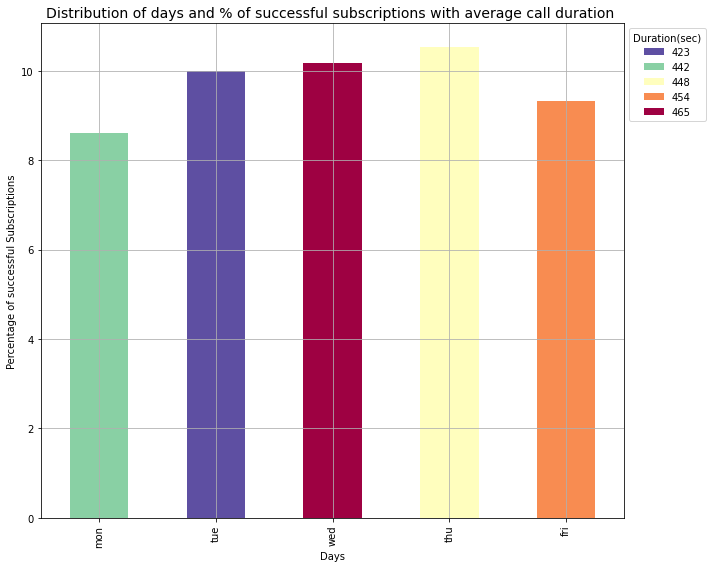

In [ ]:
#Finding out average duration of calls that were successful each day of the week
Temp6= pd.DataFrame() 
dfb_yes=dfb[dfb['y'] == 'yes']
Temp6['Yes_deposit'] = dfb_yes.groupby(['categorical_day'])['y'].count()

dfb_no = dfb[dfb['y'] == 'no']
Temp6['No_deposit'] = dfb_no.groupby(['categorical_day'])['y'].count()


Temp6['yes_duration']= dfb_yes.groupby(['categorical_day'])['duration'].mean()
Temp6['yes_duration']= Temp6['yes_duration'].replace(np.nan,0)
Temp6['yes_duration']=Temp6['yes_duration'].astype('int64')

Temp6['No_duration']= dfb_no.groupby(['categorical_day'])['duration'].mean()
Temp6['No_duration']= Temp6['No_duration'].replace(np.nan,0)
Temp6['No_duration'] = Temp6.astype({'No_duration': 'int64'})

Temp6=Temp6[Temp6['yes_duration']!=0]

Temp6['total']=Temp6['No_deposit'] + Temp6['Yes_deposit']
Temp6['Yes_deposit_percent']=(Temp6['Yes_deposit']/Temp6['total'])*100
Temp6['Yes_deposit_percent']= Temp6['Yes_deposit_percent'].replace(np.nan,0)

duration= pd.DataFrame()
duration = Temp6
duration=duration[duration['yes_duration']!=0]


plt.rcParams["figure.figsize"] = [10, 8]
plt.rcParams["figure.autolayout"] = True
duration.pivot_table(index='categorical_day', columns='yes_duration', values='Yes_deposit_percent', fill_value=0).plot.bar(stacked=True,grid=True,colormap="Spectral_r").legend(title="Duration(sec)",bbox_to_anchor=(1.0, 1.0))
# Temp4.plot.bar(stacked=True,color={"No_deposit": "IndianRed", "Yes_deposit": "MediumAquamarine"})
plt.xlabel('Days', fontsize=10)
plt.ylabel('Percentage of successful Subscriptions', fontsize=10)
plt.title('Distribution of days and % of successful subscriptions with average call duration ', loc='Center', fontsize=14)
plt.show()





**Observation:** Average duration of a call during different days of the week are nearly similar, which is 443 seconds on thursday having highest subscription rates compared to other days of the week.

**Exploration Step 7:	Do efforts of the previous campaign for a client have any effect on the current campaign? i.e., if the number of days after frequent contact effect the current campaign outcome**

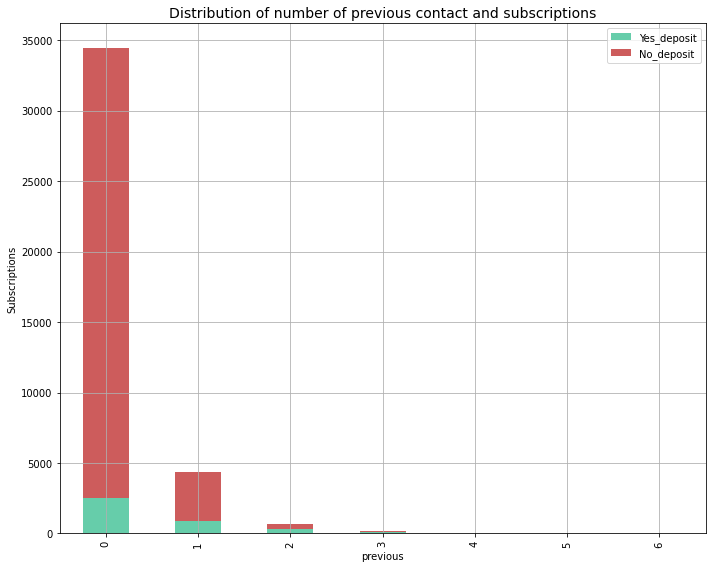

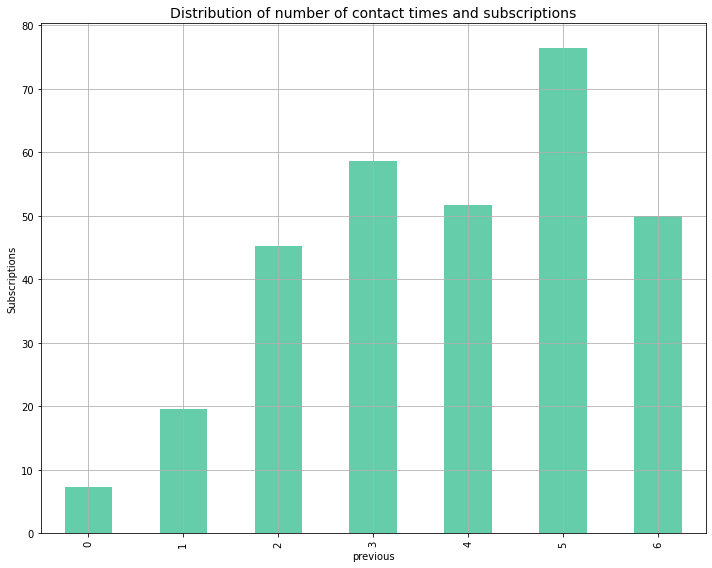

In [ ]:
Temp7= pd.DataFrame() 
sp=dfb[dfb['pdays']>0]
dfb_yes=sp[sp['y'] == 'yes']
Temp7['Yes_deposit'] = dfb_yes.groupby(['previous'])['y'].count()
dfb_no = sp[sp['y'] == 'no']
Temp7['No_deposit'] = dfb_no.groupby(['previous'])['y'].count()


Temp7.plot.bar(stacked=True,color={"No_deposit": "IndianRed", "Yes_deposit": "MediumAquamarine"})
plt.grid(zorder=3)
plt.xlabel('previous', fontsize=10)
plt.ylabel('Subscriptions', fontsize=10)
plt.title('Distribution of number of previous contact and subscriptions', loc='Center', fontsize=14)
plt.show()

# calculate the percent relative to the index
total = ((Temp7['Yes_deposit']) /(Temp7['Yes_deposit'] + Temp7['No_deposit']))*100

p1 = total.plot(kind='bar',stacked=True,color="MediumAquamarine",linewidth=1)
plt.grid(zorder=3)
plt.xlabel('previous', fontsize=10)
plt.ylabel('Subscriptions', fontsize=10)
plt.title('Distribution of number of contact times and subscriptions', loc='Center', fontsize=14)

plt.show()

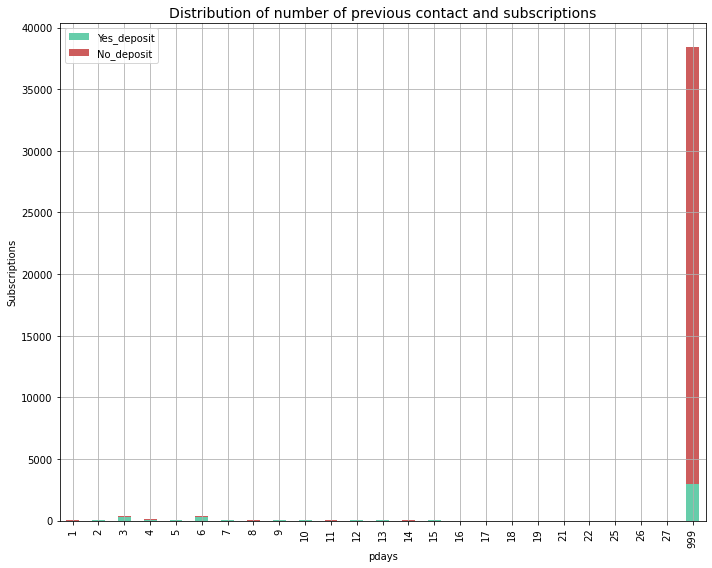

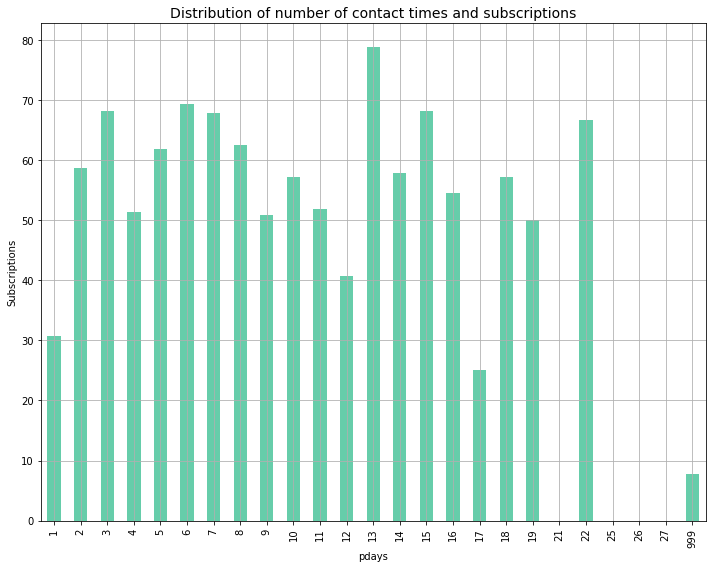

In [ ]:
Temp7= pd.DataFrame() 
sp=dfb[dfb['pdays']>0]
dfb_yes=sp[sp['y'] == 'yes']
Temp7['Yes_deposit'] = dfb_yes.groupby(['pdays'])['y'].count()
dfb_no = sp[sp['y'] == 'no']
Temp7['No_deposit'] = dfb_no.groupby(['pdays'])['y'].count()

Temp7.plot.bar(stacked=True,color={"No_deposit": "IndianRed", "Yes_deposit": "MediumAquamarine"})
plt.grid(zorder=3)
plt.xlabel('pdays', fontsize=10)
plt.ylabel('Subscriptions', fontsize=10)
plt.title('Distribution of number of previous contact and subscriptions', loc='Center', fontsize=14)
plt.show()

# calculate the percent relative to the index
total = ((Temp7['Yes_deposit']) /(Temp7['Yes_deposit'] + Temp7['No_deposit']))*100

p1 = total.plot(kind='bar',stacked=True,color="MediumAquamarine",linewidth=1)
plt.grid(zorder=3)
plt.xlabel('pdays', fontsize=10)
plt.ylabel('Subscriptions', fontsize=10)
plt.title('Distribution of number of contact times and subscriptions', loc='Center', fontsize=14)

plt.show()

**Observation:** To get higher subscription rates, the gap between last contact in the previous campaign and first contact in the present campaign should be no less than 22 days.

In [ ]:
#Performing Chi-square test of y with different other variables
# Otained from this resource https://thinkingneuron.com/how-to-measure-the-correlation-between-two-categorical-variables-in-python/

CrosstabResult=pd.crosstab(index=dfb['y'],columns=dfb['age'])
# importing the required function
from scipy.stats import chi2_contingency
 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
 
# P-Value is the Probability of H0 being True
# If P-Value&gt;0.05 then only we Accept the assumption(H0)
#if two variables are correlated, then the P-value will come very close to zero.
print('The P-Value of the ChiSq Test for age and y is:', ChiSqResult[1])

CrosstabResult=pd.crosstab(index=dfb['y'],columns=dfb['job'])
ChiSqResult = chi2_contingency(CrosstabResult)
print('The P-Value of the ChiSq Test for job and y is:', ChiSqResult[1])

CrosstabResult=pd.crosstab(index=dfb['y'],columns=dfb['marital'])
ChiSqResult = chi2_contingency(CrosstabResult)
print('The P-Value of the ChiSq Test for marital and y is:', ChiSqResult[1])

CrosstabResult=pd.crosstab(index=dfb['y'],columns=dfb['education'])
ChiSqResult = chi2_contingency(CrosstabResult)
print('The P-Value of the ChiSq Test for education and y is:', ChiSqResult[1])

CrosstabResult=pd.crosstab(index=dfb['y'],columns=dfb['default'])
ChiSqResult = chi2_contingency(CrosstabResult)
print('The P-Value of the ChiSq Test for default and y is:', ChiSqResult[1])

CrosstabResult=pd.crosstab(index=dfb['y'],columns=dfb['housing'])
ChiSqResult = chi2_contingency(CrosstabResult)
print('The P-Value of the ChiSq Test for housing and y is:', ChiSqResult[1])

CrosstabResult=pd.crosstab(index=dfb['y'],columns=dfb['loan'])
ChiSqResult = chi2_contingency(CrosstabResult)
print('The P-Value of the ChiSq Test for loan and y is:', ChiSqResult[1])

CrosstabResult=pd.crosstab(index=dfb['y'],columns=dfb['contact'])
ChiSqResult = chi2_contingency(CrosstabResult)
print('The P-Value of the ChiSq Test for contact and y is:', ChiSqResult[1])

CrosstabResult=pd.crosstab(index=dfb['y'],columns=dfb['month'])
ChiSqResult = chi2_contingency(CrosstabResult)
print('The P-Value of the ChiSq Test for month and y is:', ChiSqResult[1])

CrosstabResult=pd.crosstab(index=dfb['y'],columns=dfb['day_of_week'])
ChiSqResult = chi2_contingency(CrosstabResult)
print('The P-Value of the ChiSq Test for day_of_week and y is:', ChiSqResult[1])

CrosstabResult=pd.crosstab(index=dfb['y'],columns=dfb['duration'])
ChiSqResult = chi2_contingency(CrosstabResult)
print('The P-Value of the ChiSq Test for duration and y is:', ChiSqResult[1])

CrosstabResult=pd.crosstab(index=dfb['y'],columns=dfb['campaign'])
ChiSqResult = chi2_contingency(CrosstabResult)
print('The P-Value of the ChiSq Test for campaign and y is:', ChiSqResult[1])

CrosstabResult=pd.crosstab(index=dfb['y'],columns=dfb['pdays'])
ChiSqResult = chi2_contingency(CrosstabResult)
print('The P-Value of the ChiSq Test for pdays and y is:', ChiSqResult[1])

CrosstabResult=pd.crosstab(index=dfb['y'],columns=dfb['previous'])
ChiSqResult = chi2_contingency(CrosstabResult)
print('The P-Value of the ChiSq Test for previous and y is:', ChiSqResult[1])

CrosstabResult=pd.crosstab(index=dfb['y'],columns=dfb['poutcome'])
ChiSqResult = chi2_contingency(CrosstabResult)
print('The P-Value of the ChiSq Test for poutcome and y is:', ChiSqResult[1])

The P-Value of the ChiSq Test for age and y is: 1.3837141491152574e-212
The P-Value of the ChiSq Test for job and y is: 1.9706474784135933e-170
The P-Value of the ChiSq Test for marital and y is: 2.089618152851095e-37
The P-Value of the ChiSq Test for education and y is: 2.1358431143813295e-51
The P-Value of the ChiSq Test for default and y is: 1.253460925998997e-96
The P-Value of the ChiSq Test for housing and y is: 0.03014222272486938
The P-Value of the ChiSq Test for loan and y is: 0.3298900534767799
The P-Value of the ChiSq Test for contact and y is: 6.006794335332338e-188
The P-Value of the ChiSq Test for month and y is: 0.0
The P-Value of the ChiSq Test for day_of_week and y is: 0.0002236454011669844
The P-Value of the ChiSq Test for duration and y is: 0.0
The P-Value of the ChiSq Test for campaign and y is: 2.2904696966799673e-31
The P-Value of the ChiSq Test for pdays and y is: 0.0
The P-Value of the ChiSq Test for previous and y is: 0.0
The P-Value of the ChiSq Test for poutco

Above results shows that month,duration,pdays,previous and poutcome are higly correlated with the output variable Y.

**Distribution of marital status and number of subscriptions**

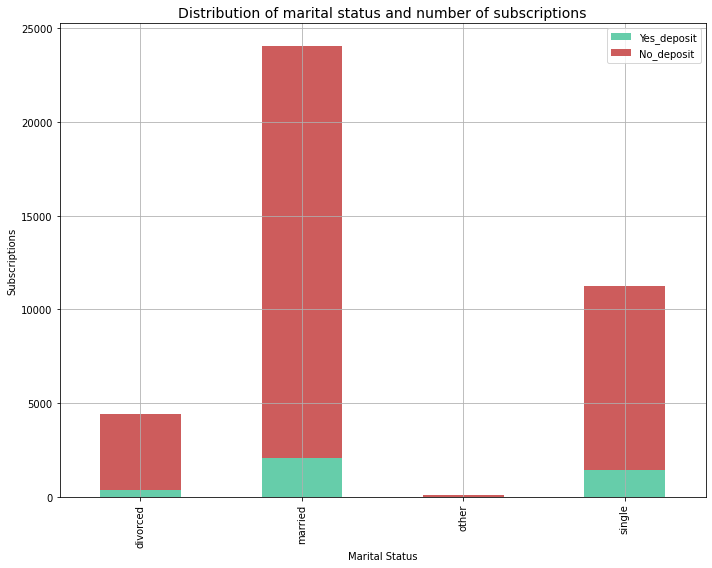

In [ ]:
Temp7= pd.DataFrame() 
sp=dfb[dfb['pdays']>0]
dfb_yes=sp[sp['y'] == 'yes']
Temp7['Yes_deposit'] = dfb_yes.groupby(['marital'])['y'].count()
dfb_no = sp[sp['y'] == 'no']
Temp7['No_deposit'] = dfb_no.groupby(['marital'])['y'].count()


Temp7.plot.bar(stacked=True,color={"No_deposit": "IndianRed", "Yes_deposit": "MediumAquamarine"})
plt.grid(zorder=3)
plt.xlabel('Marital Status', fontsize=10)
plt.ylabel('Subscriptions', fontsize=10)
plt.title('Distribution of marital status and number of subscriptions', loc='Center', fontsize=14)
plt.show()

**Distribution of communication type  and number of subscriptions**

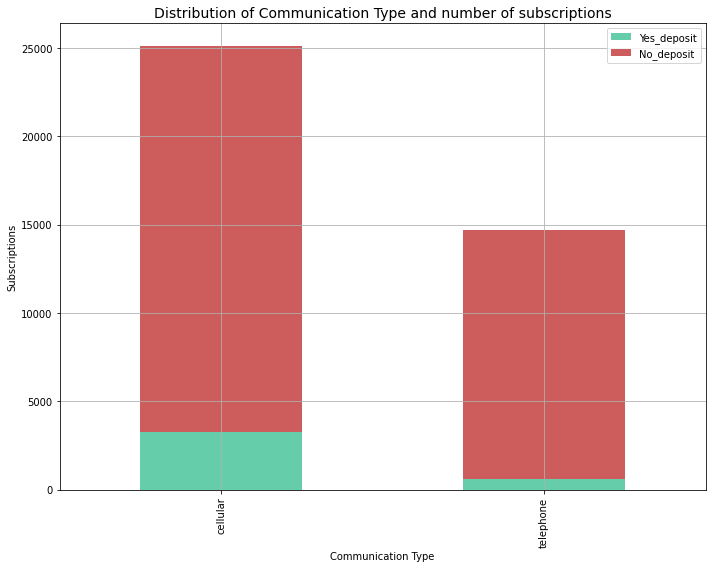

In [ ]:
Temp7= pd.DataFrame() 
sp=dfb[dfb['pdays']>0]
dfb_yes=sp[sp['y'] == 'yes']
Temp7['Yes_deposit'] = dfb_yes.groupby(['contact'])['y'].count()
dfb_no = sp[sp['y'] == 'no']
Temp7['No_deposit'] = dfb_no.groupby(['contact'])['y'].count()


Temp7.plot.bar(stacked=True,color={"No_deposit": "IndianRed", "Yes_deposit": "MediumAquamarine"})
plt.grid(zorder=3)
plt.xlabel('Communication Type', fontsize=10)
plt.ylabel('Subscriptions', fontsize=10)
plt.title('Distribution of Communication Type and number of subscriptions', loc='Center', fontsize=14)
plt.show()

**Distribution of loan and number of subscriptions**

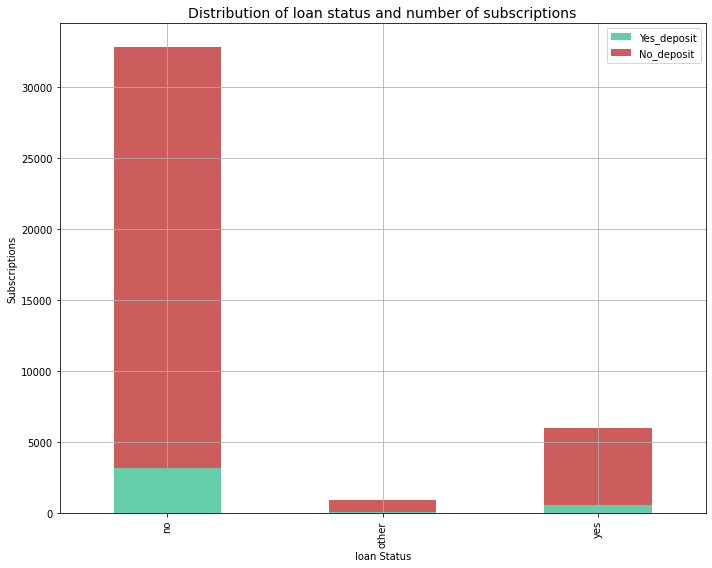

In [ ]:
Temp7= pd.DataFrame() 
sp=dfb[dfb['pdays']>0]
dfb_yes=sp[sp['y'] == 'yes']
Temp7['Yes_deposit'] = dfb_yes.groupby(['loan'])['y'].count()
dfb_no = sp[sp['y'] == 'no']
Temp7['No_deposit'] = dfb_no.groupby(['loan'])['y'].count()


Temp7.plot.bar(stacked=True,color={"No_deposit": "IndianRed", "Yes_deposit": "MediumAquamarine"})
plt.grid(zorder=3)
plt.xlabel('loan Status', fontsize=10)
plt.ylabel('Subscriptions', fontsize=10)
plt.title('Distribution of loan status and number of subscriptions', loc='Center', fontsize=14)
plt.show()

**Conclusion:**

> 

* The customer's age affects campaign outcome as well. Future campains should concentrate on customers from age categories below 30 years old and above 50 years old.
* Number of contacts with the customer during the campaign is also very important. The number of contacts during the present campaign with the customer shouldn't exceed 5 in order to obtain 60% of subscription rates.
* The last conact time after previous should be 22 days to stay connected with the clients and obtain higher subscription rates. 
* Also, higher subscription rates are observed when contacted students and retired people. 
* Average duration of the call highly effects subdcription rates. It is also dependent on the age, education and job categories.
*  Higher subscription rates are observed in the months of march and december.

From these conclusions, targeting people with age less than 30 or more than 60 and contacting them less than 5 times and talking to them less than 400 sec could improve chances of securing a subscription. 












